In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import tresonator as T

%matplotlib notebook

# Finding the error bar when interpolating the measurements

In [4]:
# Load a matched configuration - S-parameter measurements
filename = 'data/RES2.ASC'

exp_freq,reS11,imS11 = np.loadtxt(filename, skiprows=14, delimiter=';', unpack=True)

exp_mag = np.sqrt(reS11**2 + imS11**2)
exp_mag_dB = 20*np.log10(exp_mag)
# find the match frequency 
exp_freq_match = exp_freq[np.argmin(exp_mag)]
print('Match frequency : {} MHz'.format(exp_freq_match/1e6))

Match frequency : 62.640625 MHz


In [15]:
def optim_fun_impedance(short_properties, use_add_loss):
    L_DUT, Z_DUT, L_CEA, Z_CEA, add_loss = short_properties
    # calculates the resonator S11 vs freq
    S11dB = []
    for f in exp_freq:
        if not use_add_loss: # force no additional loss is requested
            add_loss = 1
        _cfg = T.Configuration(f, P_in=1, L_DUT=L_DUT, L_CEA=L_CEA, 
                               Z_short_DUT=Z_DUT, Z_short_CEA=Z_CEA, 
                               additional_losses=add_loss)
        S11dB.append(_cfg.S11dB())
    
    crit = np.sum( (np.array(S11dB) - exp_mag_dB)**2) #least square 
    print(short_properties, crit)
    return crit  

In [13]:
d_DUT_0 = 0.035 # m
d_CEA_0 = 0.035 # m
Z_DUT_0 = 0.01 # Ohm
Z_CEA_0 = 0.01 # Ohm
add_loss = 1.0

In [17]:
# find a optimum taking into account additional losses
bounds_pties = ((20e-3, 63e-3), (1e-3, 1), # d,Z DUT
                (5e-3, 200e-3), (1e-3, 1), # d,Z CEA
                (0.1, 2)) # add losses
opt_res = minimize(optim_fun_impedance, (d_DUT_0, Z_DUT_0, d_CEA_0, Z_CEA_0, add_loss),
                  bounds=bounds_pties, args=(True))

[ 0.035  0.01   0.035  0.01   1.   ] 9956.68645719
[ 0.03500001  0.01        0.035       0.01        1.        ] 9956.70295757
[ 0.035       0.01000001  0.035       0.01        1.        ] 9956.68444726
[ 0.035       0.01        0.03500001  0.01        1.        ] 9956.68712244
[ 0.035       0.01        0.035       0.01000001  1.        ] 9956.68554714
[ 0.035       0.01        0.035       0.01        1.00000001] 9956.68640812
[ 0.02   1.     0.005  1.     2.   ] 6430.98245699
[ 0.02000001  1.          0.005       1.          2.        ] 6430.98242234
[ 0.02        1.00000001  0.005       1.          2.        ] 6430.9824574
[ 0.02        1.          0.00500001  1.          2.        ] 6430.98244365
[ 0.02        1.          0.005       1.00000001  2.        ] 6430.98245801
[ 0.02        1.          0.005       1.          2.00000001] 6430.98245703
[ 0.02024813  1.          0.00512956  1.          2.        ] 6429.95300604
[ 0.02024814  1.          0.00512956  1.          2.        ] 6

[ 0.03931448  0.09282735  0.08048025  0.09473015  0.82754898] 7106.88961131
[ 0.03931447  0.09282736  0.08048025  0.09473015  0.82754898] 7106.88955203
[ 0.03931447  0.09282735  0.08048026  0.09473015  0.82754898] 7106.88954828
[ 0.03931447  0.09282735  0.08048025  0.09473016  0.82754898] 7106.88954817
[ 0.03931447  0.09282735  0.08048025  0.09473015  0.82754899] 7106.88955638
[ 0.03182914  0.12184755  0.04270843  0.12435169  1.05747627] 5934.24884735
[ 0.03182915  0.12184755  0.04270843  0.12435169  1.05747627] 5934.2501887
[ 0.03182914  0.12184756  0.04270843  0.12435169  1.05747627] 5934.24887736
[ 0.03182914  0.12184755  0.04270844  0.12435169  1.05747627] 5934.24989238
[ 0.03182914  0.12184755  0.04270843  0.1243517   1.05747627] 5934.24884575
[ 0.03182914  0.12184755  0.04270843  0.12435169  1.05747628] 5934.24884745
[ 0.03075465  0.12601326  0.03728646  0.12860373  1.09048125] 5515.93789484
[ 0.03075466  0.12601326  0.03728646  0.12860373  1.09048125] 5515.93653355
[ 0.03075465 

[ 0.03663357  0.00100001  0.02274102  0.00483502  0.94329083] 2118.32525616
[ 0.03663357  0.001       0.02274103  0.00483502  0.94329083] 2118.32942348
[ 0.03663357  0.001       0.02274102  0.00483503  0.94329083] 2118.32591231
[ 0.03663357  0.001       0.02274102  0.00483502  0.94329084] 2118.3264045
[ 0.03267459  0.001       0.03357024  0.00430904  0.95346098] 392.108243506
[ 0.0326746   0.001       0.03357024  0.00430904  0.95346098] 392.093688811
[ 0.03267459  0.00100001  0.03357024  0.00430904  0.95346098] 392.10672625
[ 0.03267459  0.001       0.03357025  0.00430904  0.95346098] 392.101329036
[ 0.03267459  0.001       0.03357024  0.00430905  0.95346098] 392.107614895
[ 0.03267459  0.001       0.03357024  0.00430904  0.95346099] 392.108208886
[ 0.063  1.     0.005  1.     2.   ] 8635.86015096
[ 0.06300001  1.          0.005       1.          2.        ] 8635.86158989
[ 0.063       1.00000001  0.005       1.          2.        ] 8635.86013725
[ 0.063       1.          0.00500001  1

[ 0.03309781  0.00320422  0.03240553  0.00655931  0.95421532] 165.115852564
[ 0.03309781  0.00320422  0.03240552  0.00655932  0.95421532] 165.115087586
[ 0.03309781  0.00320422  0.03240552  0.00655931  0.95421533] 165.115289802
[ 0.03302086  0.00313419  0.03262299  0.00647693  0.95505652] 173.62614265
[ 0.03302087  0.00313419  0.03262299  0.00647693  0.95505652] 173.666775405
[ 0.03302086  0.0031342   0.03262299  0.00647693  0.95505652] 173.627791697
[ 0.03302086  0.00313419  0.032623    0.00647693  0.95505652] 173.642983187
[ 0.03302086  0.00313419  0.03262299  0.00647694  0.95505652] 173.626799649
[ 0.03302086  0.00313419  0.03262299  0.00647693  0.95505653] 173.626179182
[ 0.03307224  0.00318095  0.03247778  0.00653194  0.95449486] 162.901354824
[ 0.03307225  0.00318095  0.03247778  0.00653194  0.95449486] 162.908734254
[ 0.03307224  0.00318096  0.03247778  0.00653194  0.95449486] 162.901275966
[ 0.03307224  0.00318095  0.03247779  0.00653194  0.95449486] 162.903871737
[ 0.03307224 

[ 0.03309802  0.00342449  0.03238758  0.00677937  0.95430176] 159.82328173
[ 0.03309802  0.00342449  0.03238757  0.00677938  0.95430176] 159.82312033
[ 0.03309802  0.00342449  0.03238757  0.00677937  0.95430177] 159.823121072
[ 0.03309802  0.00342449  0.03238757  0.00677937  0.95430176] 159.823121108
[ 0.03309803  0.00342449  0.03238757  0.00677937  0.95430176] 159.823581437
[ 0.03309802  0.0034245   0.03238757  0.00677937  0.95430176] 159.82312023
[ 0.03309802  0.00342449  0.03238758  0.00677937  0.95430176] 159.823281728
[ 0.03309802  0.00342449  0.03238757  0.00677938  0.95430176] 159.823120328
[ 0.03309802  0.00342449  0.03238757  0.00677937  0.95430177] 159.82312107
[ 0.03309802  0.00342449  0.03238757  0.00677937  0.95430176] 159.823121107
[ 0.03309803  0.00342449  0.03238757  0.00677937  0.95430176] 159.823581437
[ 0.03309802  0.0034245   0.03238757  0.00677937  0.95430176] 159.823120229
[ 0.03309802  0.00342449  0.03238758  0.00677937  0.95430176] 159.823281728
[ 0.03309802  0.

[ 0.03309783  0.00344623  0.03238701  0.00680105  0.95432457] 159.814151659
[ 0.03309783  0.00344623  0.03238701  0.00680104  0.95432458] 159.814151632
[ 0.03309784  0.00344555  0.03238703  0.00680036  0.95432385] 159.814111077
[ 0.03309785  0.00344555  0.03238703  0.00680036  0.95432385] 159.814131787
[ 0.03309784  0.00344556  0.03238703  0.00680036  0.95432385] 159.814111036
[ 0.03309784  0.00344555  0.03238704  0.00680036  0.95432385] 159.814115144
[ 0.03309784  0.00344555  0.03238703  0.00680037  0.95432385] 159.814111125
[ 0.03309784  0.00344555  0.03238703  0.00680036  0.95432386] 159.814111078
[ 0.03309784  0.0034455   0.03238703  0.00680031  0.9543238 ] 159.814109071
[ 0.03309785  0.0034455   0.03238703  0.00680031  0.9543238 ] 159.814131482
[ 0.03309784  0.00344551  0.03238703  0.00680031  0.9543238 ] 159.814109038
[ 0.03309784  0.0034455   0.03238704  0.00680031  0.9543238 ] 159.814113755
[ 0.03309784  0.0034455   0.03238703  0.00680032  0.9543238 ] 159.814109121
[ 0.03309784

In [21]:
# find a optimum taking into account additional losses
bounds_pties = ((20e-3, 63e-3), (1e-3, 1), # d,Z DUT
                (5e-3, 200e-3), (1e-3, 1), # d,Z CEA
                (0.1, 2)) # add losses
opt_res_noloss = minimize(optim_fun_impedance, (d_DUT_0, Z_DUT_0, d_CEA_0, Z_CEA_0, add_loss),
                  bounds=bounds_pties, args=(False))


[ 0.035  0.01   0.035  0.01   1.   ] 9956.68645719
[ 0.03500001  0.01        0.035       0.01        1.        ] 9956.70295757
[ 0.035       0.01000001  0.035       0.01        1.        ] 9956.68444726
[ 0.035       0.01        0.03500001  0.01        1.        ] 9956.68712244
[ 0.035       0.01        0.035       0.01000001  1.        ] 9956.68554714
[ 0.035       0.01        0.035       0.01        1.00000001] 9956.68645719
[ 0.02   1.     0.005  1.     1.   ] 6426.66527517
[ 0.02000001  1.          0.005       1.          1.        ] 6426.66523514
[ 0.02        1.00000001  0.005       1.          1.        ] 6426.66527554
[ 0.02        1.          0.00500001  1.          1.        ] 6426.66526334
[ 0.02        1.          0.005       1.00000001  1.        ] 6426.66527618
[ 0.02        1.          0.005       1.          1.00000001] 6426.66527517
[ 0.0203025   1.          0.00510005  1.          1.        ] 6425.34321066
[ 0.02030251  1.          0.00510005  1.          1.        ] 

[ 0.03337583  0.08694395  0.03976796  0.0895239   1.        ] 5870.22396709
[ 0.03337584  0.08694395  0.03976796  0.0895239   1.        ] 5870.22760444
[ 0.03337583  0.08694396  0.03976796  0.0895239   1.        ] 5870.22396924
[ 0.03337583  0.08694395  0.03976797  0.0895239   1.        ] 5870.22560971
[ 0.03337583  0.08694395  0.03976796  0.08952391  1.        ] 5870.22394457
[ 0.03337583  0.08694395  0.03976796  0.0895239   1.00000001] 5870.22396709
[ 0.03145378  0.001       0.03988907  0.00392199  1.        ] 5922.79969208
[ 0.03145379  0.001       0.03988907  0.00392199  1.        ] 5922.83810991
[ 0.03145378  0.00100001  0.03988907  0.00392199  1.        ] 5922.79809882
[ 0.03145378  0.001       0.03988908  0.00392199  1.        ] 5922.81117062
[ 0.03145378  0.001       0.03988907  0.003922    1.        ] 5922.79893929
[  3.14537793e-02   1.00000000e-03   3.98890733e-02   3.92199028e-03
   1.00000001e+00] 5922.79969208
[ 0.03230899  0.03924072  0.03983518  0.04201052  1.        ] 

[ 0.04289638  0.001       0.005       0.00520851  1.        ] 3634.37668364
[ 0.04289639  0.001       0.005       0.00520851  1.        ] 3634.37867943
[ 0.04289638  0.00100001  0.005       0.00520851  1.        ] 3634.37583368
[ 0.04289638  0.001       0.00500001  0.00520851  1.        ] 3634.3766574
[ 0.04289638  0.001       0.005       0.00520852  1.        ] 3634.37631638
[  4.28963768e-02   1.00000000e-03   5.00000000e-03   5.20851474e-03
   1.00000001e+00] 3634.37668364
[ 0.03395283  0.001       0.03008222  0.00422435  1.        ] 872.550221311
[ 0.03395284  0.001       0.03008222  0.00422435  1.        ] 872.566899968
[ 0.03395283  0.00100001  0.03008222  0.00422435  1.        ] 872.548935606
[ 0.03395283  0.001       0.03008223  0.00422435  1.        ] 872.554562385
[ 0.03395283  0.001       0.03008222  0.00422436  1.        ] 872.549656151
[  3.39528320e-02   1.00000000e-03   3.00822245e-02   4.22435493e-03
   1.00000001e+00] 872.550221311
[ 0.03244635  0.001       0.03430715 

[ 0.0331316   0.0027545   0.03229965  0.00591383  1.00000001] 160.06898856
[ 0.03311474  0.00272832  0.03234556  0.00588604  1.        ] 159.961590368
[ 0.03311475  0.00272832  0.03234556  0.00588604  1.        ] 159.959549052
[ 0.03311474  0.00272833  0.03234556  0.00588604  1.        ] 159.961513332
[ 0.03311474  0.00272832  0.03234557  0.00588604  1.        ] 159.96075821
[ 0.03311474  0.00272832  0.03234556  0.00588605  1.        ] 159.961559938
[ 0.03311474  0.00272832  0.03234556  0.00588604  1.00000001] 159.961590368
[ 0.03310555  0.00272673  0.03237043  0.00588373  1.        ] 159.863395807
[ 0.03310556  0.00272673  0.03237043  0.00588373  1.        ] 159.862582996
[ 0.03310555  0.00272674  0.03237043  0.00588373  1.        ] 159.863361875
[ 0.03310555  0.00272673  0.03237044  0.00588373  1.        ] 159.863060758
[ 0.03310555  0.00272673  0.03237043  0.00588374  1.        ] 159.863382409
[ 0.03310555  0.00272673  0.03237043  0.00588373  1.00000001] 159.863395807
[ 0.03310229  

[ 0.03310095  0.00273812  0.03238226  0.00589503  1.00000001] 159.82786395
[ 0.03310095  0.00273812  0.03238226  0.00589503  1.        ] 159.82786395
[ 0.03310096  0.00273812  0.03238226  0.00589503  1.        ] 159.827455764
[ 0.03310095  0.00273813  0.03238226  0.00589503  1.        ] 159.827849941
[ 0.03310095  0.00273812  0.03238227  0.00589503  1.        ] 159.827699321
[ 0.03310095  0.00273812  0.03238226  0.00589504  1.        ] 159.827858609
[ 0.03310095  0.00273812  0.03238226  0.00589503  1.00000001] 159.82786395
[ 0.03310095  0.00273812  0.03238226  0.00589503  1.        ] 159.82786395
[ 0.03310096  0.00273812  0.03238226  0.00589503  1.        ] 159.827455764
[ 0.03310095  0.00273813  0.03238226  0.00589503  1.        ] 159.827849941
[ 0.03310095  0.00273812  0.03238227  0.00589503  1.        ] 159.827699321
[ 0.03310095  0.00273812  0.03238226  0.00589504  1.        ] 159.827858609
[ 0.03310095  0.00273812  0.03238226  0.00589503  1.00000001] 159.82786395
[ 0.03310095  0.0

[ 0.03309784  0.0034455   0.03238703  0.00680031  0.95432379]
[ 0.03310095  0.00273812  0.03238226  0.00589503  1.        ]


<IPython.core.display.Javascript object>


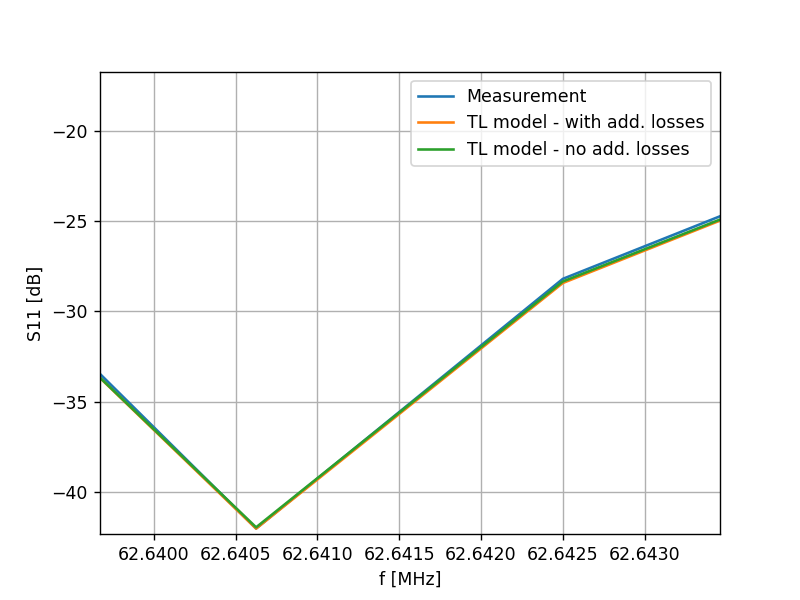

(62.5, 62.8)

In [24]:
P_in = 20e3 # W

print(opt_res.x)
print(opt_res_noloss.x)

S11dB = []
S11dB_noloss = []

L_DUT_opt, Z_DUT_opt, L_CEA_opt, Z_CEA_opt, add_loss_opt = opt_res.x
L_DUT_opt_nl, Z_DUT_opt_nl, L_CEA_opt_nl, Z_CEA_opt_nl, add_loss_opt_nl = opt_res_noloss.x

for f in exp_freq:
    _cfg = T.Configuration(f, P_in, L_DUT_opt, L_CEA_opt, 
                           Z_short_DUT = Z_DUT_opt, Z_short_CEA = Z_CEA_opt, 
                           additional_losses=add_loss_opt)
    S11dB.append(_cfg.S11dB())
    
    _cfg = T.Configuration(f, P_in, L_DUT_opt_nl, L_CEA_opt_nl, 
                           Z_short_DUT = Z_DUT_opt_nl, Z_short_CEA = Z_CEA_opt_nl, 
                           additional_losses=add_loss_opt_nl)
    S11dB_noloss.append(_cfg.S11dB())    
    

fig,ax=plt.subplots()
ax.plot(exp_freq/1e6, exp_mag_dB)
ax.plot(exp_freq/1e6, S11dB)
ax.plot(exp_freq/1e6, S11dB_noloss)
ax.legend(('Measurement', 'TL model - with add. losses', 'TL model - no add. losses'))
plt.grid(True)
ax.set_xlabel('f [MHz]')
ax.set_ylabel('S11 [dB]')
ax.set_xlim(62.5, 62.8)